In [188]:
import numpy as np
import pandas as pd
import lxml
import json
import html5lib
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import folium # map rendering library
import requests
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

In [189]:
link = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
df_list = pd.read_html(link)

In [190]:
df = df_list[0]

In [191]:
df.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [192]:
df.rename(columns={'Postcode':'PostalCode','Neighbourhood':'Neighborhood'},inplace=True)

In [193]:
df = df[df['Borough']!='Not assigned']

In [194]:
df = df.groupby('PostalCode',as_index=False).agg({'Borough':'first','Neighborhood':','.join})

In [195]:
for index,row in df.iterrows():
    if(row['Neighborhood'] == 'Not assigned'):
        df.replace(row['Neighborhood'],row['Borough'],inplace=True)

In [196]:
df.head()

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge,Malvern"
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
2,M1E,Scarborough,"Guildwood,Morningside,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [197]:
df.shape[0]

103

In [198]:
df_geo = pd.read_csv('Geospatial_Coordinates.csv')

In [199]:
df_geo.rename(columns={'Postal Code':'PostalCode'},inplace=True)

In [200]:
df_geo.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [201]:
df_location = df.merge(df_geo,how='inner',on='PostalCode')

In [202]:
df_location

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff,Cliffside West",43.692657,-79.264848


In [203]:
df_location.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [204]:
df_location.shape

(103, 5)

In [205]:
toronto_data = df_location[df_location['Borough'].str.contains("Toronto")].reset_index(drop=True)
toronto_data.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West,Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"The Beaches West,India Bazaar",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


In [206]:
toronto_data.drop(['PostalCode'],axis=1,inplace=True)
toronto_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,East Toronto,The Beaches,43.676357,-79.293031
1,East Toronto,"The Danforth West,Riverdale",43.679557,-79.352188
2,East Toronto,"The Beaches West,India Bazaar",43.668999,-79.315572
3,East Toronto,Studio District,43.659526,-79.340923
4,Central Toronto,Lawrence Park,43.728020,-79.388790


In [207]:
toronto_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )

The Beaches
The Danforth West,Riverdale
The Beaches West,India Bazaar
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park,Summerhill East
Deer Park,Forest Hill SE,Rathnelly,South Hill,Summerhill West
Rosedale
Cabbagetown,St. James Town
Church and Wellesley
Harbourfront
Ryerson,Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide,King,Richmond
Harbourfront East,Toronto Islands,Union Station
Design Exchange,Toronto Dominion Centre
Commerce Court,Victoria Hotel
Roselawn
Forest Hill North,Forest Hill West
The Annex,North Midtown,Yorkville
Harbord,University of Toronto
Chinatown,Grange Park,Kensington Market
CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place,Underground city
Christie
Dovercourt Village,Dufferin
Little Portugal,Trinity
Brockton,Exhibition Place,Parkdale Village
High Park,The Junction South
Parkdale,Roncesvalles
Runnymede

In [208]:
print(toronto_venues.shape)
toronto_venues.head()

(1704, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Glen Stewart Park,43.675278,-79.294647,Park
3,The Beaches,43.676357,-79.293031,Glen Stewart Ravine,43.676300,-79.294784,Other Great Outdoors
4,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub


In [209]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide,King,Richmond",100,100,100,100,100,100
Berczy Park,56,56,56,56,56,56
"Brockton,Exhibition Place,Parkdale Village",24,24,24,24,24,24
Business Reply Mail Processing Centre 969 Eastern,18,18,18,18,18,18
"CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara",17,17,17,17,17,17
"Cabbagetown,St. James Town",44,44,44,44,44,44
Central Bay Street,83,83,83,83,83,83
"Chinatown,Grange Park,Kensington Market",84,84,84,84,84,84
Christie,18,18,18,18,18,18


In [210]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 232 uniques categories.


In [211]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [212]:
toronto_onehot.shape

(1704, 232)

In [213]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,"Adelaide,King,Richmond",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,...,0.000000,0.000000,0.00,0.020000,0.000000,0.000000,0.000000,0.010000,0.000000,0.01
1,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.017857,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
2,"Brockton,Exhibition Place,Parkdale Village",0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
3,Business Reply Mail Processing Centre 969 Eastern,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
4,"CN Tower,Bathurst Quay,Island airport,Harbourf...",0.000000,0.000000,0.058824,0.058824,0.058824,0.117647,0.176471,0.117647,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
5,"Cabbagetown,St. James Town",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
6,Central Bay Street,0.012048,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012048,...,0.000000,0.000000,0.00,0.012048,0.000000,0.012048,0.000000,0.012048,0.000000,0.00
7,"Chinatown,Grange Park,Kensington Market",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.047619,0.000000,0.000000,0.059524,0.011905,0.000000,0.00
8,Christie,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
9,Church and Wellesley,0.011765,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011765,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.011765,0.000000,0.011765,0.00


In [214]:
toronto_grouped.shape

(39, 232)

In [215]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
#     print(temp['freq'])
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide,King,Richmond----
              venue  freq
0       Coffee Shop  0.07
1              Café  0.04
2               Bar  0.04
3  Asian Restaurant  0.03
4        Restaurant  0.03


----Berczy Park----
            venue  freq
0     Coffee Shop  0.09
1    Cocktail Bar  0.05
2            Café  0.04
3  Farmers Market  0.04
4          Bakery  0.04


----Brockton,Exhibition Place,Parkdale Village----
            venue  freq
0            Café  0.12
1     Yoga Studio  0.08
2  Breakfast Spot  0.08
3     Coffee Shop  0.08
4          Bakery  0.04


----Business Reply Mail Processing Centre 969 Eastern----
                venue  freq
0  Light Rail Station  0.11
1         Yoga Studio  0.06
2       Auto Workshop  0.06
3          Comic Shop  0.06
4         Pizza Place  0.06


----CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara----
              venue  freq
0   Airport Service  0.18
1    Airport Lounge  0.12
2  Airport Terminal  0.12
3      

In [216]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
toronto_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
toronto_neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    toronto_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

toronto_neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide,King,Richmond",Coffee Shop,Café,Bar,Hotel,Restaurant,Steakhouse,Burger Joint,Cosmetics Shop,Asian Restaurant,Thai Restaurant
1,Berczy Park,Coffee Shop,Cocktail Bar,Cheese Shop,Seafood Restaurant,Farmers Market,Beer Bar,Bakery,Steakhouse,Café,Gourmet Shop
2,"Brockton,Exhibition Place,Parkdale Village",Café,Yoga Studio,Breakfast Spot,Coffee Shop,Gym,Pet Store,Performing Arts Venue,Italian Restaurant,Intersection,Gym / Fitness Center
3,Business Reply Mail Processing Centre 969 Eastern,Light Rail Station,Yoga Studio,Garden,Butcher,Fast Food Restaurant,Auto Workshop,Farmers Market,Burrito Place,Spa,Pizza Place
4,"CN Tower,Bathurst Quay,Island airport,Harbourf...",Airport Service,Airport Terminal,Airport Lounge,Sculpture Garden,Plane,Coffee Shop,Boat or Ferry,Boutique,Harbor / Marina,Airport Gate


In [ ]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

In [217]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [218]:
neighborhoods_data = newyork_data['features']

In [219]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [220]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [221]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )



Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [222]:
print(manhattan_venues.shape)
manhattan_venues.head()

(3289, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop
4,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop


In [223]:
manhattan_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Battery Park City,95,95,95,95,95,95
Carnegie Hill,99,99,99,99,99,99
Central Harlem,44,44,44,44,44,44
Chelsea,100,100,100,100,100,100
Chinatown,100,100,100,100,100,100
Civic Center,100,100,100,100,100,100
Clinton,100,100,100,100,100,100
East Harlem,39,39,39,39,39,39
East Village,100,100,100,100,100,100


In [224]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,...,Vietnamese Restaurant,Volleyball Court,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [225]:
manhattan_onehot.shape

(3289, 337)

In [226]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,...,Vietnamese Restaurant,Volleyball Court,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Battery Park City,0.000000,0.00,0.00,0.000000,0.010526,0.00,0.00,0.000000,0.000000,...,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.031579,0.000000,0.031579,0.000000
1,Carnegie Hill,0.000000,0.00,0.00,0.000000,0.010101,0.00,0.00,0.000000,0.010101,...,0.020202,0.00,0.000000,0.00,0.00,0.010101,0.030303,0.000000,0.010101,0.030303
2,Central Harlem,0.000000,0.00,0.00,0.068182,0.045455,0.00,0.00,0.000000,0.000000,...,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
3,Chelsea,0.000000,0.00,0.00,0.000000,0.030000,0.00,0.00,0.000000,0.000000,...,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.020000,0.000000,0.010000,0.000000
4,Chinatown,0.000000,0.00,0.00,0.000000,0.040000,0.00,0.00,0.000000,0.000000,...,0.030000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
5,Civic Center,0.000000,0.00,0.00,0.000000,0.030000,0.01,0.00,0.000000,0.000000,...,0.000000,0.00,0.000000,0.00,0.00,0.020000,0.020000,0.010000,0.000000,0.030000
6,Clinton,0.000000,0.00,0.00,0.000000,0.040000,0.00,0.00,0.000000,0.000000,...,0.000000,0.00,0.000000,0.00,0.00,0.020000,0.030000,0.000000,0.000000,0.000000
7,East Harlem,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,...,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
8,East Village,0.000000,0.00,0.00,0.000000,0.020000,0.01,0.00,0.020000,0.010000,...,0.020000,0.00,0.000000,0.00,0.00,0.050000,0.010000,0.000000,0.000000,0.000000
9,Financial District,0.010000,0.00,0.00,0.000000,0.040000,0.00,0.00,0.000000,0.000000,...,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.030000,0.000000,0.010000,0.000000


In [227]:
manhattan_grouped.shape

(40, 337)

In [228]:
num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
           venue  freq
0           Park  0.06
1    Coffee Shop  0.05
2          Hotel  0.05
3  Women's Store  0.03
4      Wine Shop  0.03


----Carnegie Hill----
                 venue  freq
0          Coffee Shop  0.07
1          Pizza Place  0.06
2       Cosmetics Shop  0.04
3  Japanese Restaurant  0.03
4               Bakery  0.03


----Central Harlem----
                 venue  freq
0   African Restaurant  0.07
1  American Restaurant  0.05
2   Seafood Restaurant  0.05
3                  Bar  0.05
4    French Restaurant  0.05


----Chelsea----
                venue  freq
0         Coffee Shop  0.06
1  Italian Restaurant  0.05
2              Bakery  0.05
3      Ice Cream Shop  0.04
4           Nightclub  0.03


----Chinatown----
                 venue  freq
0   Chinese Restaurant  0.11
1         Cocktail Bar  0.04
2  American Restaurant  0.04
3                  Spa  0.03
4   Salon / Barbershop  0.03


----Civic Center----
                  venue  freq
0    I

In [229]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
manhattan_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
manhattan_neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    manhattan_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

manhattan_neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Coffee Shop,Hotel,Wine Shop,Women's Store,Clothing Store,Gym,Memorial Site,Pizza Place,Grocery Store
1,Carnegie Hill,Coffee Shop,Pizza Place,Cosmetics Shop,Yoga Studio,Bakery,Gym,Bookstore,Café,Japanese Restaurant,Wine Shop
2,Central Harlem,African Restaurant,Chinese Restaurant,American Restaurant,Bar,Cosmetics Shop,Seafood Restaurant,French Restaurant,Fried Chicken Joint,Bookstore,Caribbean Restaurant
3,Chelsea,Coffee Shop,Bakery,Italian Restaurant,Ice Cream Shop,Nightclub,Theater,American Restaurant,Hotel,Tapas Restaurant,Cocktail Bar
4,Chinatown,Chinese Restaurant,Cocktail Bar,American Restaurant,Salon / Barbershop,Bakery,Spa,Optical Shop,Vietnamese Restaurant,Hotpot Restaurant,Sandwich Place


In [230]:
toronto_grouped.shape,manhattan_grouped.shape

((39, 232), (40, 337))

In [231]:
toronto_neighborhoods_venues_sorted.shape,manhattan_neighborhoods_venues_sorted.shape

((39, 11), (40, 11))

In [232]:
array1=[]
array2=[]
for i in range(39):
    array1.append('Toronto')
for i in range(40):
    array2.append('New York')
toronto_neighborhoods_venues_sorted.insert(1,'City',array1)
manhattan_neighborhoods_venues_sorted.insert(1,'City',array2)

In [233]:
toronto_grouped.head()

,Neighborhood,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,"Adelaide,King,Richmond",0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.02,...,0.0,0.0,0.0,0.020000,0.0,0.0,0.0,0.01,0.0,0.01
1,Berczy Park,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.0,0.0,0.0,0.017857,0.0,0.0,0.0,0.00,0.0,0.00
2,"Brockton,Exhibition Place,Parkdale Village",0.083333,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.00
3,Business Reply Mail Processing Centre 969 Eastern,0.055556,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.00
4,"CN Tower,Bathurst Quay,Island airport,Harbourf...",0.000000,0.0,0.058824,0.058824,0.058824,0.117647,0.176471,0.117647,0.00,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.00


In [234]:
manhattan_grouped.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,...,Vietnamese Restaurant,Volleyball Court,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Battery Park City,0.0,0.0,0.0,0.000000,0.010526,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.031579,0.0,0.031579,0.000000
1,Carnegie Hill,0.0,0.0,0.0,0.000000,0.010101,0.0,0.0,0.0,0.010101,...,0.020202,0.0,0.0,0.0,0.0,0.010101,0.030303,0.0,0.010101,0.030303
2,Central Harlem,0.0,0.0,0.0,0.068182,0.045455,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
3,Chelsea,0.0,0.0,0.0,0.000000,0.030000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.020000,0.0,0.010000,0.000000
4,Chinatown,0.0,0.0,0.0,0.000000,0.040000,0.0,0.0,0.0,0.000000,...,0.030000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000


In [235]:
toronto_manhattan_grouped = pd.concat([toronto_grouped,manhattan_grouped],sort=False)

In [236]:
toronto_manhattan_grouped.shape

(79, 379)

In [237]:
toronto_manhattan_grouped.head()

,Neighborhood,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Turkish Restaurant,Udon Restaurant,Used Bookstore,Venezuelan Restaurant,Veterinarian,Volleyball Court,Waterfront,Weight Loss Center,Whisky Bar,Wings Joint
0,"Adelaide,King,Richmond",0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Berczy Park,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Brockton,Exhibition Place,Parkdale Village",0.083333,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Business Reply Mail Processing Centre 969 Eastern,0.055556,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"CN Tower,Bathurst Quay,Island airport,Harbourf...",0.000000,0.0,0.058824,0.058824,0.058824,0.117647,0.176471,0.117647,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [238]:
toronto_manhattan_grouped.fillna(0.0,inplace=True)

In [239]:
toronto_manhattan_grouped.head()

,Neighborhood,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Turkish Restaurant,Udon Restaurant,Used Bookstore,Venezuelan Restaurant,Veterinarian,Volleyball Court,Waterfront,Weight Loss Center,Whisky Bar,Wings Joint
0,"Adelaide,King,Richmond",0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Berczy Park,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Brockton,Exhibition Place,Parkdale Village",0.083333,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Business Reply Mail Processing Centre 969 Eastern,0.055556,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"CN Tower,Bathurst Quay,Island airport,Harbourf...",0.000000,0.0,0.058824,0.058824,0.058824,0.117647,0.176471,0.117647,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [240]:
toronto_manhattan_sorted_neighborhoods = pd.concat([toronto_neighborhoods_venues_sorted,manhattan_neighborhoods_venues_sorted],sort=False)

In [241]:
toronto_manhattan_sorted_neighborhoods.shape

(79, 12)

In [242]:
toronto_manhattan_sorted_neighborhoods.head()

,Neighborhood,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide,King,Richmond",Toronto,Coffee Shop,Café,Bar,Hotel,Restaurant,Steakhouse,Burger Joint,Cosmetics Shop,Asian Restaurant,Thai Restaurant
1,Berczy Park,Toronto,Coffee Shop,Cocktail Bar,Cheese Shop,Seafood Restaurant,Farmers Market,Beer Bar,Bakery,Steakhouse,Café,Gourmet Shop
2,"Brockton,Exhibition Place,Parkdale Village",Toronto,Café,Yoga Studio,Breakfast Spot,Coffee Shop,Gym,Pet Store,Performing Arts Venue,Italian Restaurant,Intersection,Gym / Fitness Center
3,Business Reply Mail Processing Centre 969 Eastern,Toronto,Light Rail Station,Yoga Studio,Garden,Butcher,Fast Food Restaurant,Auto Workshop,Farmers Market,Burrito Place,Spa,Pizza Place
4,"CN Tower,Bathurst Quay,Island airport,Harbourf...",Toronto,Airport Service,Airport Terminal,Airport Lounge,Sculpture Garden,Plane,Coffee Shop,Boat or Ferry,Boutique,Harbor / Marina,Airport Gate


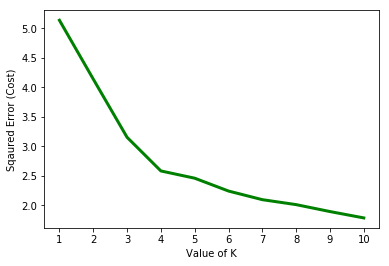

In [243]:
import matplotlib.pyplot as plt
cost =[] 
for i in range(1, 11): 
    X = toronto_manhattan_grouped.drop('Neighborhood', 1)
    KM = KMeans(n_clusters = i,n_init=12) 
    KM.fit(X) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)         
plt.plot(range(1, 11), cost, color ='g', linewidth ='3')
plt.xticks(range(1, 11),range(1, 11))
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 
  
# the point of the elbow is the  
# most optimal value for choosing k 

In [244]:
cost

[5.137511503820568,
 4.140566981766263,
 3.153488411046918,
 2.5828180147065884,
 2.4599108642493923,
 2.2421514896896864,
 2.0959599078791196,
 2.011868827392606,
 1.8944149502683822,
 1.7866240706007686]

In [245]:
# set number of clusters
kclusters = 4

toronto_manhattan_grouped_clustering = toronto_manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [246]:
# add clustering labels
toronto_manhattan_sorted_neighborhoods.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_manhattan_merged = pd.concat([toronto_data,manhattan_data])

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_manhattan_merged = toronto_manhattan_merged.join(toronto_manhattan_sorted_neighborhoods.set_index('Neighborhood'), on='Neighborhood')

toronto_manhattan_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,East Toronto,The Beaches,43.676357,-79.293031,0,Toronto,Other Great Outdoors,Trail,Pub,Health Food Store,Park,Colombian Restaurant,Comfort Food Restaurant,Eastern European Restaurant,Dumpling Restaurant,Donut Shop
1,East Toronto,"The Danforth West,Riverdale",43.679557,-79.352188,1,Toronto,Greek Restaurant,Coffee Shop,Italian Restaurant,Ice Cream Shop,Furniture / Home Store,Grocery Store,Restaurant,Pub,Pizza Place,Lounge
2,East Toronto,"The Beaches West,India Bazaar",43.668999,-79.315572,1,Toronto,Sandwich Place,Park,Fish & Chips Shop,Steakhouse,Pub,Food & Drink Shop,Ice Cream Shop,Fast Food Restaurant,Burrito Place,Italian Restaurant
3,East Toronto,Studio District,43.659526,-79.340923,1,Toronto,Café,Coffee Shop,Gastropub,Bakery,Italian Restaurant,Brewery,American Restaurant,Yoga Studio,Bookstore,Seafood Restaurant
4,Central Toronto,Lawrence Park,43.728020,-79.388790,0,Toronto,Park,Swim School,Bus Line,Event Space,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant,Dog Run


In [247]:
toronto_manhattan_merged.shape

(79, 16)

In [248]:
toronto_manhattan_merged = toronto_manhattan_merged.reset_index(drop=True)

In [249]:
# create map
map_clusters = folium.Map(zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, city, cluster in zip(toronto_manhattan_merged['Latitude'], toronto_manhattan_merged['Longitude'], toronto_manhattan_merged['Neighborhood'], toronto_manhattan_merged['City'], toronto_manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + '-' + city +' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [250]:
toronto_manhattan_merged.loc[toronto_manhattan_merged['Cluster Labels'] == 0, toronto_manhattan_merged.columns[[1] + list(range(5, toronto_manhattan_merged.shape[1]))]]

,Neighborhood,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,The Beaches,Toronto,Other Great Outdoors,Trail,Pub,Health Food Store,Park,Colombian Restaurant,Comfort Food Restaurant,Eastern European Restaurant,Dumpling Restaurant,Donut Shop
4,Lawrence Park,Toronto,Park,Swim School,Bus Line,Event Space,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant,Dog Run
10,Rosedale,Toronto,Park,Playground,Trail,Dance Studio,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant,Dog Run
23,"Forest Hill North,Forest Hill West",Toronto,Park,Jewelry Store,Trail,Sushi Restaurant,Women's Store,Deli / Bodega,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant


In [251]:
toronto_manhattan_merged.loc[toronto_manhattan_merged['Cluster Labels'] == 1, toronto_manhattan_merged.columns[[1] + list(range(5, toronto_manhattan_merged.shape[1]))]]

,Neighborhood,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,"The Danforth West,Riverdale",Toronto,Greek Restaurant,Coffee Shop,Italian Restaurant,Ice Cream Shop,Furniture / Home Store,Grocery Store,Restaurant,Pub,Pizza Place,Lounge
2,"The Beaches West,India Bazaar",Toronto,Sandwich Place,Park,Fish & Chips Shop,Steakhouse,Pub,Food & Drink Shop,Ice Cream Shop,Fast Food Restaurant,Burrito Place,Italian Restaurant
3,Studio District,Toronto,Café,Coffee Shop,Gastropub,Bakery,Italian Restaurant,Brewery,American Restaurant,Yoga Studio,Bookstore,Seafood Restaurant
5,Davisville North,Toronto,Hotel,Department Store,Park,Gym,Breakfast Spot,Dog Run,Sandwich Place,Food & Drink Shop,Women's Store,Dumpling Restaurant
6,North Toronto West,Toronto,Coffee Shop,Sporting Goods Shop,Yoga Studio,Café,Spa,Diner,Dessert Shop,Salon / Barbershop,Burger Joint,Restaurant
7,Davisville,Toronto,Dessert Shop,Sandwich Place,Pizza Place,Café,Coffee Shop,Sushi Restaurant,Gym,Italian Restaurant,Restaurant,Farmers Market
9,"Deer Park,Forest Hill SE,Rathnelly,South Hill,...",Toronto,Pub,Coffee Shop,Pizza Place,American Restaurant,Sushi Restaurant,Sports Bar,Restaurant,Fried Chicken Joint,Bagel Shop,Supermarket
11,"Cabbagetown,St. James Town",Toronto,Coffee Shop,Restaurant,Italian Restaurant,Pizza Place,Chinese Restaurant,Café,Pub,Bakery,Sandwich Place,Breakfast Spot
12,Church and Wellesley,Toronto,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Restaurant,Gay Bar,Fast Food Restaurant,Burger Joint,Gym,Gastropub,Bubble Tea Shop
13,Harbourfront,Toronto,Coffee Shop,Park,Bakery,Pub,Café,Breakfast Spot,Mexican Restaurant,Spa,Restaurant,Hotel


In [252]:
toronto_manhattan_merged.loc[toronto_manhattan_merged['Cluster Labels'] == 2, toronto_manhattan_merged.columns[[1] + list(range(5, toronto_manhattan_merged.shape[1]))]]

,Neighborhood,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Roselawn,Toronto,Garden,Women's Store,Deli / Bodega,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant,Dog Run


In [253]:
toronto_manhattan_merged.loc[toronto_manhattan_merged['Cluster Labels'] == 3, toronto_manhattan_merged.columns[[1] + list(range(5, toronto_manhattan_merged.shape[1]))]]

,Neighborhood,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,"Moore Park,Summerhill East",Toronto,Playground,Women's Store,Deli / Bodega,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant,Dog Run


In [ ]:
CLIENT_ID = 'VO0GVZAAV5DGAAQXY1QTLLK4HKEKJWLI1PLW4RTQF1BMEQAQ' # your Foursquare ID
CLIENT_SECRET = 'WBQ1OUCX5ESDWWIK4MIIOKRWHHBNJ5VZRRPMYWPMUB3KNBT0' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [ ]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [ ]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    LIMIT = 100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]